# Import packages.

In [40]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline

# Get and arrange data.

In [41]:
# Filenames of data.
newFileNames = ('hits-6-6', 'hits-7-5', 'hits-8-4',
             'hits-cryo-6-6', 'hits-cryo-7-5', 'hits-cryo-8-4')
bruceFileNames = ('hits-bruce-6-6', 'hits-bruce-10-6')

fileNames = newFileNames + bruceFileNames
fileNames

('hits-6-6',
 'hits-7-5',
 'hits-8-4',
 'hits-cryo-6-6',
 'hits-cryo-7-5',
 'hits-cryo-8-4',
 'hits-bruce-6-6',
 'hits-bruce-10-6')

In [43]:
# Read in data.
dataFrames = [
    pd.read_csv(
        '../data/' + fileName + '.csv',
        names = ('e',   # energy deposit
                 'x',   # x position
                 'y',   # y position
                 'z',   # z position
                 'id')  # track ID
    )
    for fileName in fileNames
]

dataFrames

[               e         x         y        z       id
 0       0.004748 -0.121949  0.214303  66.7208        1
 1       0.010072 -0.121946  0.214315  66.6678        1
 2       0.014141 -0.121939  0.214341  66.5529        1
 3       0.002499 -0.121939  0.214344  66.5413        1
 4       0.007534 -0.121935  0.214359  66.4773        1
 5       0.020373 -0.121927  0.214392  66.3472        1
 6       0.001301 -0.121926  0.214396  66.3333        1
 7       0.037229 -0.121907  0.214469  66.0738        1
 8       0.000393 -0.121906  0.214470  66.0707        1
 9       0.031785 -0.121885  0.214540  65.8306        1
 10      0.009372 -0.121876  0.214566  65.7478        1
 11      0.037317 -0.121849  0.214640  65.4858        1
 12      0.003286 -0.121847  0.214644  65.4718        1
 13      0.033586 -0.121822  0.214700  65.2536        1
 14      0.016598 -0.121805  0.214751  65.0702        1
 15      0.008006 -0.121800  0.214766  65.0110        1
 16      0.026102 -0.121786  0.214806  64.8470  

In [44]:
tubeZ = 35 / 2  # Half length of tubes in mm.

# Dataframes for tubes only.
tubeDFs = [df[df.z.abs() < tubeZ] for df in dataFrames]

# Define an analysis function.

In [45]:
tubeMiddleZ = 8 / 2  # Half length of middle tube section in mm.

def analyze(name, dataFrame, kind='all'):
    '''
    Analyze one set of data.
    `binsPerMil`: Bins per millimeter for histgrams.
    `kind`: Kind of data - 'all' or just the 'tubes'.
    '''
    ## Energy vs. z histogram.
    # Plot's x and y boundaries.
    histZLimit = 70 if kind == 'all' else tubeZ
    histELimit = 35 if kind == 'all' else 2.25
    
    binsPerMil = 10  # Bins per millimeter for histograms.
    
    histBins = np.linspace(  # The bins.
        -histZLimit, histZLimit, int(binsPerMil * 2 * histZLimit + 1))
    
    # Energy vs. z histogram.
    plt.figure()
    plt.title(name)
    plt.ylim(0, histELimit)
    dataFrame.z.hist(weights=dataFrame.e, bins=histBins)
    plt.show()
    
    ## Energy deposit sums.
    print(f'Total energy deposit: \n{dataFrame.e.sum()} MeV')
    
    if kind == 'tubes':
        print('Energy deposit in middle tubes: \n'
              f'{dataFrame[dataFrame.z.abs() < tubeMiddleZ].e.sum()}'
              ' MeV')

# Use it to analyze and plot stuff.

## All Data

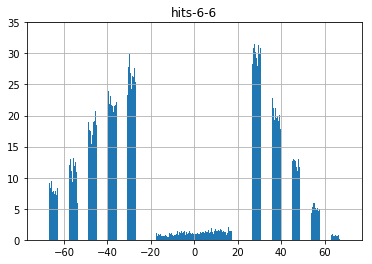

Total energy deposit: 
6667.7041683027655 MeV


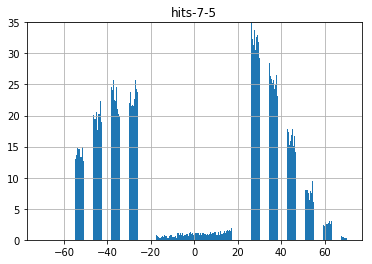

Total energy deposit: 
6992.461319344953 MeV


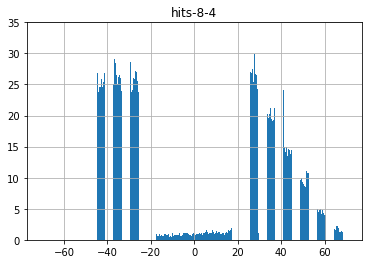

Total energy deposit: 
6574.148027063777 MeV


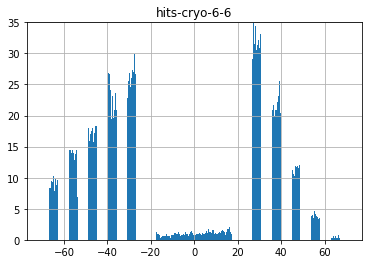

Total energy deposit: 
6751.2875616868 MeV


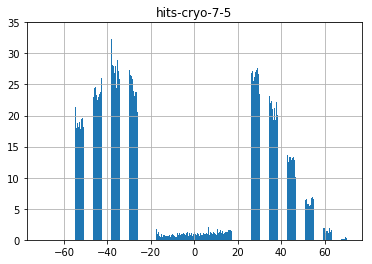

Total energy deposit: 
7000.656237165795 MeV


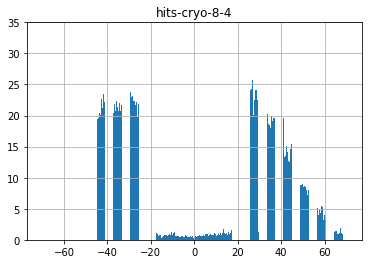

Total energy deposit: 
5804.134973222114 MeV


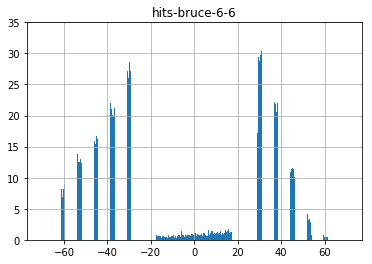

Total energy deposit: 
3434.3511545115944 MeV


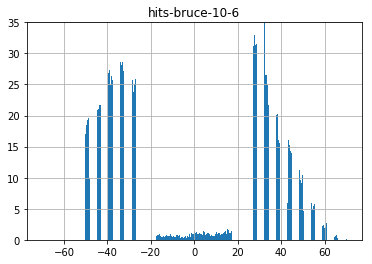

Total energy deposit: 
4986.779597962385 MeV


In [46]:
for fn, df in zip(fileNames, dataFrames):
    analyze(fn, df)

## Tubes Only

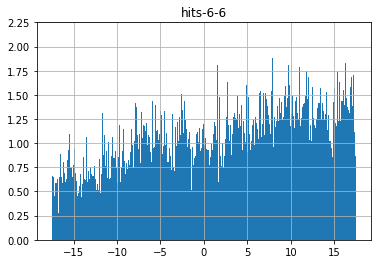

Total energy deposit: 
379.7091604717474 MeV
Energy deposit in middle tubes: 
84.84774345748 MeV


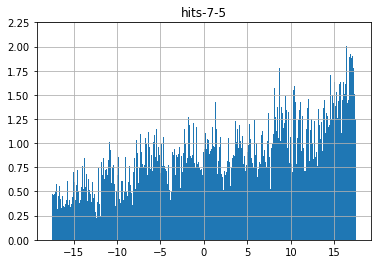

Total energy deposit: 
315.99292863536164 MeV
Energy deposit in middle tubes: 
70.529401388243 MeV


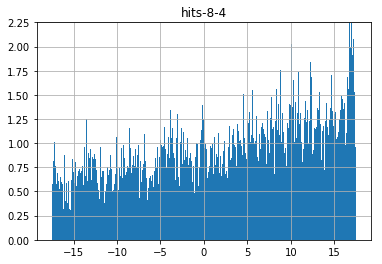

Total energy deposit: 
337.196939930344 MeV
Energy deposit in middle tubes: 
72.66687929321999 MeV


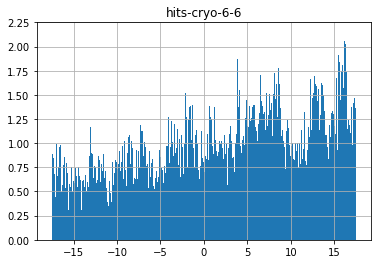

Total energy deposit: 
352.13936293239203 MeV
Energy deposit in middle tubes: 
79.802508935882 MeV


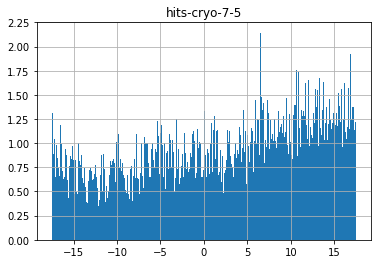

Total energy deposit: 
334.80827551982946 MeV
Energy deposit in middle tubes: 
70.456313781603 MeV


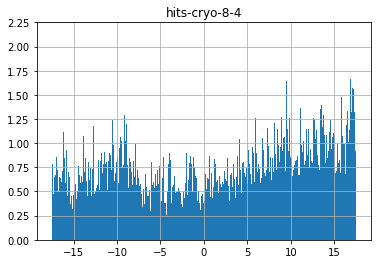

Total energy deposit: 
267.74522608125034 MeV
Energy deposit in middle tubes: 
47.9767390809903 MeV


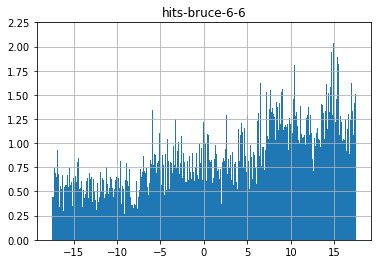

Total energy deposit: 
305.47255066469984 MeV
Energy deposit in middle tubes: 
64.9007546913198 MeV


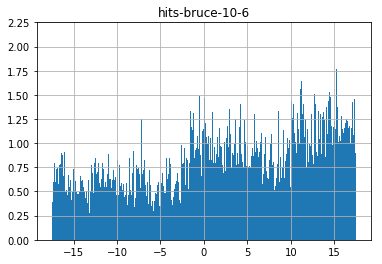

Total energy deposit: 
295.05253255616606 MeV
Energy deposit in middle tubes: 
71.007203314612 MeV


In [47]:
for fn, df in zip(fileNames, tubeDFs):
    analyze(fn, df, 'tubes')

## Comparing individual dataframes.

In [ ]:
for i in (0, 3, 6):
    analyze(fileNames[i], tubeDFs[i], kind='tubes')